# Logistic Regression

<iframe width="560" height="315" src="https://www.youtube.com/embed/1eazvcI2_kE?si=qdwzBmy8eoEjab2J" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

[Slides: Logistic Regression](https://github.com/ichatnun/brainCodeCamp2023_lectures/blob/main/MachineLearning/machine_learning_logistic_regression.pdf)

<br>

ก่อนหน้านี้  เราได้เรียนรู้ Simple Linear Model ในสัปดาห์ที่ 3 ทำให้เราสามารถพัฒนาโมเดลเชิงเส้น (linear model) เพื่อทำนายค่า $y$ โดยเรียนรู้จากชุดข้อมูลที่มีโดยไม่จำกัดค่าที่เป็นไปได้ของค่า $y$ ในกรณีที่ชุดข้อมูลประกอบด้วย 1 feature คือ $x$ เราสามารถเขียนสมการของความสัมพันธ์เชิงเส้นได้เป็น


$$y = w_0 + w_1x$$


โดยที่ $w_0$ และ $w_1$ คือ พารามิเตอร์ของโมเดลเชิงเส้น

อย่างไรก็ดี มีโจทย์อีกประเภทหนึ่ง คือ classification problem หรือ ปัญหาการจำแนกหมวดหมู่ ซึ่ง $y$ เป็น label ของหมวดหมู่ (class) โดยมักแทนด้วยตัวเลข (เช่น จำนวนเต็ม) เพื่อให้สามารถทำงานกับระบบคำนวณของคอมพิวเตอร์ได้

ในกรณีที่ชุดข้อมูลประกอบด้วย 2 classes หรือ binary classification เรามักกำหนดให้ค่า $y$ มีค่าเป็น 0 หรือ 1 แทน label ของแต่ละ class เช่น
การใช้เลข 0 แทน class แรก และตัวเลข 1 แทน class ที่สอง
  
การนำเอา linear model ตามสมการด้านบนมาใช้ทำนายค่า $y$ ในโจทย์ประเภทนี้จะไม่เหมาะนัก เนื่องจาก linear model นั้นให้ค่า $y$ ได้ตั้งแต่ $-∞$ ไปจนถึง $+∞$ ในขณะที่เราต้องการค่า $y$ ที่เป็น 0 หรือ 1 เท่านั้น

วิธีหนึ่งที่เราสามารถใช้ในการแก้ปัญหาตรงนี้ก็คือการนำเอาฟังก์ชันทางคณิตศาสตร์มาใช้แปลงค่า $y$ ที่เราได้รับมาจากสมการ $y = w_0 + w_1x$ ให้มีค่าอยู่ระหว่าง 0 กับ 1 ได้ หนึ่งในฟังก์ชันที่มีคุณสมบัติดังกล่าว คือ logistic function หรือ sigmoid function ซึ่งมีสมการทางคณิตศาสตร์ ดังนี้


$$
g(x) = \frac{1}{1 + e^{-x}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ตั้งค่า random seed สำหรับการทำซ้ำ (reproducibility)
RANDOM_SEED = 2566

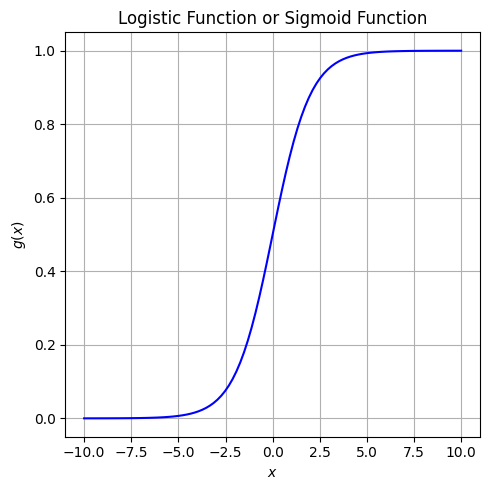

In [2]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# คำนวณค่า sigmoid function ด้วยช่วงค่า x ที่กำหนด
x   = np.linspace(-10, 10, 100)
sig = sigmoid_function(x)

# plot sigmoid function
plt.figure(figsize = (5,5))
plt.plot(x, sig, 'b')

plt.grid()
plt.xlabel('$x$')
plt.ylabel('$g(x)$')
plt.title('Logistic Function or Sigmoid Function')
plt.tight_layout()
plt.show()

จะเห็นได้ว่า logistic function มีค่าในช่วง 0 ถึง 1 เสมอ ดังนั้นสิ่งที่เราทำได้ก็คือเปลี่ยนจากการให้ตัวโมเดล output ค่า $w_0 + w_1x$ ซึ่งมีค่าจาก $-∞$ ไปจนถึง $+∞$ ไปเป็นการ output ค่า $g(w_0 + w_1x)$ ซึ่งมีค่ามากกว่าหรือเท่ากับ 0 แต่น้อยกว่าหรือเท่ากับ 1 แทน

หากเรากำหนดให้ ค่า $y=0$ แทน class 0 และ ค่า $y=1$ แทน class 1 เราอาจจะตีความ output ใหม่ของโมเดล $g(w_0 + w_1x)$ เป็นค่าความน่าจะเป็นที่จุดข้อมูล $x$ ของเราเป็น class 1 โดยสามารถเขียนเป็นสมการทางคณิตศาสตร์ได้เป็น


$$
P(\text{class 1}| x) = y = g(w_0 + w_1x) = \frac{1}{1 + e^{-(w_0+w_1x)}}
$$


อ้างอิงจากสมการนี้ จะพบว่าโมเดลจะ output ค่า $y$ ออกมา ซึ่งค่า $y$ นี้จะแสดงถึงความน่าจะเป็นที่จุดข้อมูลที่ใส่เข้ามาในโมเดลจะเป็น class 1 เราสามารถกำหนดเงื่อนไขของการตัดสินใจว่าจุดข้อมูลที่เรานำมาทดสอบเป็น class ใด โดยการใช้เทียบดูว่า ค่า $y$ ซึ่งเป็น output ของโมเดล มีค่าน้อยกว่า 0.5 หรือไม่

- $y ≥ 0.5 →$ จุดข้อมูลดังกล่าวเป็น class 1
- $y < 0.5 →$ จุดข้อมูลดังกล่าวเป็น class 2

ในที่นี้บริเวณที่เกิดค่าความน่าจะเป็นที่ 0.5 จะเป็นบริเวณที่เกิด decision boundary ขึ้น


โมเดล logistic จะเรียนรู้จากชุดข้อมูล โดยปรับค่าพารามิเตอร์ของโมเดล $w_0$ และ $w_1$ เพื่อให้ค่า $y$ ที่ทำนายออกมามีความคลาดเคลื่อนจากค่า $y$ ที่เป็นผลเฉลยของชุดข้อมูลน้อยที่สุด

<br><br>


---

**Optional: ข้อมูลทางเทคนิคเพิ่มเติมสำหรับผู้ที่สนใจ**

<br>

**ข้อแรก**

หากเราโยกย้ายพจน์ต่าง ๆ ในสมการ


$$ P(\text{class 1}| x) = \frac{1}{1 + e^{-(w_0+w_1x)}} $$

เราสามารถแสดงได้ว่า

$$
log\left(\frac{P(\text{class 1}| x)}{1-P(\text{class 1}| x)}\right) = w_0+w_1x
$$

พจน์ด้านซ้ายมือมีชื่อเรียกว่า **log-odds** ซึ่งเป็นค่า log ของ *ความน่าจะเป็นที่เป็น class 1* หารด้วย *ความน่าจะเป็นที่ไม่เป็น class 1*

เราจะเห็นได้ว่า logistic regression สร้างแบบจำลองโดยการกำหนดให้ log-odds เป็นฟังก์ชัน linear

เรามาลองดูคุณสมบัติของ log-odds กันนิดนึงดีกว่า
* ถ้า $P(\text{class 1}| x) → 0$ (ความน่าจะเป็นที่เป็น class 1 มีค่าเข้าใกล้ 0) จะพบว่าค่า
$
log\left(\frac{P(\text{class 1}| x)}{1-P(\text{class 1}| x)}\right) → -∞
$

* ถ้า $P(\text{class 1}| x) → 1$ (ความน่าจะเป็นที่เป็น class 1 มีค่าเข้าใกล้ 1) จะพบว่าค่า
$
log\left(\frac{P(\text{class 1}| x)}{1-P(\text{class 1}| x)}\right) → +∞
$

จะเห็นได้ว่าค่า log-odds นั้นมีค่าที่เป็นไปได้ระหว่าง -∞ ถึง +∞  ซึ่งจะไม่ขัดแย้งกับค่าที่เป็นไปได้ของสมการ $w_0+w_1x$ ที่เราใช้สำหรับโมเดลตัว log-odds เลย

จากข้อสังเกตนี้ เราเห็นได้ว่าจริง ๆ แล้ว logistic regression นั้น มีความเกี่ยวข้องกับ linear regression ค่อนข้างมาก ซึ่งเราสามารถมองได้ว่า logistic regression ก็คล้าย ๆ กับการนำเอา linear regression มาใช้งาน แต่เราตีความ output ที่ออกมาว่าเป็น log-odds

<br>

**ข้อที่สอง**

ในการตัดสินใจว่าจุดข้อมูล $x$ มีเป็น class 1 เราใช้เงื่อนไข


$$ y = \frac{1}{1 + e^{-(w_0+w_1x)}} ≥ 0.5 $$


เรามาลองโยกย้ายสมการกันดู


$$
\begin{align}
\frac{1}{1 + e^{-(w_0+w_1x)}} &≥ \frac{1}{2} \\ \\
2 &≥ 1 + e^{-(w_0+w_1x)} \\ \\
1 &≥ e^{-(w_0+w_1x)} \\ \\
ln(1) &≥ ln(e^{-(w_0+w_1x)}) \\ \\
0 &≥ -(w_0+w_1x) \\ \\
w_0+w_1x &≥ 0\\
\end{align}
$$

ซึ่งแปลว่า

* $y ≥ 0.5 ⟷ w_0+w_1x ≥ 0$
* $y ≤ 0.5 ⟷ w_0+w_1x ≤ 0$

ดังนั้นเราจะได้เงื่อนไขในการแบ่งคลาสในอีกรูปแบบหนึ่ง ก็คือ

- $w_0+w_1x ≥ 0 →$ จุดข้อมูลดังกล่าวเป็น class 1
- $w_0+w_1x ≤ 0 →$ จุดข้อมูลดังกล่าวเป็น class 2

ซึ่งเป็นอสมการแบบ linear

เราจะได้เห็นจากหลาย ๆ ตัวอย่างใน tutorial นี้ว่า decision boundary ก็มีลักษณะเป็นเส้นตรงจริง ๆ

---

<br><br>
ใน tutorial นี้เราจะเรียนรู้การทำงานของ logistic regression ผ่านการเรียกใช้ `LogisticRegression` จากไลบรารี่ `scikit-learn` ที่จะแสดงต่อไป.

## Generate Simulated Dataset
เพื่อเปรียบเทียบการทำงานของ Linear regression และ Logistic regression เราจะลองสร้างชุดข้อมูลที่ประกอบไปด้วย จำนวน 100 จุด $(x_1,y_1), (x_2,y_2), ..., (x_i,y_i),.., (x_{100},y_{100})$

โดย $y$ มีค่า 0 หรือ 1 (2-class dataset for binary classification) และแต่ละคลาสมีจำนวนข้อมูลเท่ากันที่จำนวน 50 จุด

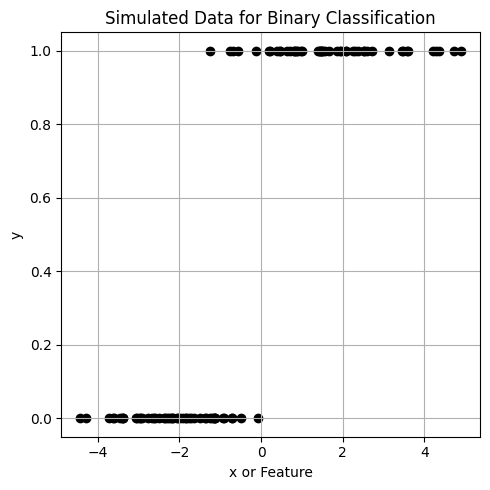

In [3]:
def generate_multi_class_dataset(n_classes, n_features, mean_class, std_class,n_samples):
    # สร้างชุดข้อมูลแบบ multi-class
    # ตั้งค่า random seed เพื่อให้สามารถสร้างชุดข้อมูลเดิมทุกครั้ง เพื่อใช้สำหรับการสอน
    np.random.seed(RANDOM_SEED)

    #  สร้างข้อมูล x สำหรับแต่ละคลาส
    x_data = []
    for label in range(n_classes):
        _ = np.random.normal(mean_class[label], std_class[label], (n_samples, n_features))
        x_data.append(_)

    # สร้างข้อมูล y หรือ labels สำหรับแต่ละคลาส
    y_data = []
    y_data.append(np.zeros(n_samples))
    for label in range(1, n_classes):
        y_data.append(label*np.ones(n_samples))

    # รวมข้อมูล x และ y จากทุกคลาส
    x = np.vstack((x_data))
    y = np.hstack(y_data)

    return x, y

# ทดลองสร้างข้อมูลโดยการเรียกใช้ generate_multi_class_dataset
# กำหนด จำนวนคลาส
n_classes = 2

# กำหนด จำนวน features
n_features = 1

# กำหนดค่า Mean และ standard deviation สำหรับแต่ละคลาส
mean_class = [-2, 2]
std_class  = [1, 1.5]

# กำหนดจำนวนข้อมูล สำหรับแต่ละคลาส (รวม 100 จุด)
n_samples =  50

# ทำการสร้างชุดข้อมูล
x,y = generate_multi_class_dataset(n_classes, n_features, mean_class, std_class,n_samples)

# Plot ข้อมูล x, y ที่มีสร้างขึ้น
plt.figure(figsize = (5,5))
plt.scatter(x, y, c='k')
plt.grid()
plt.ylabel('y')
plt.xlabel('x or Feature')
plt.title('Simulated Data for Binary Classification')
plt.tight_layout()
plt.show()

เราจะลอง fit ข้อมูลชุดนี้ ด้วย [Linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) และ [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) จากไลบรารี่ `scikit-learn`

Linear model: R2 = 0.71
Linear regression: y(x) = x*0.18 + 0.54
Logistic model: accuracy = 0.95
Logistic regression: probability function P(x) = g(x*2.31 + 1.08)


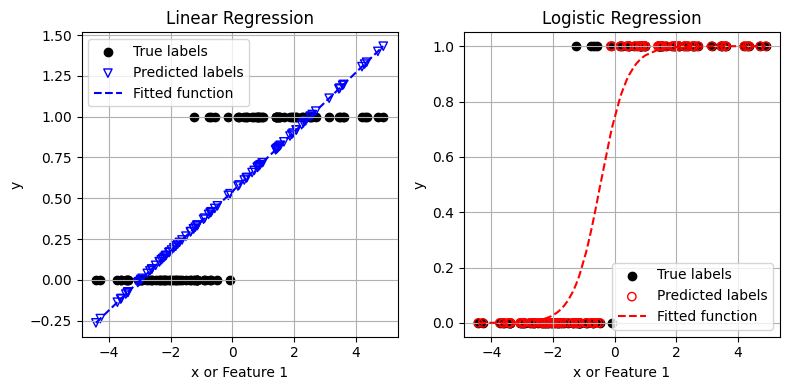

In [4]:
# สร้าง Linear Model
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

# สอนโมเดลจากข้อมูล x, y ที่มี แล้วทำนายค่า $y$
clf.fit(x, y)
y_linear = clf.predict(x)
print('Linear model: R2 = {:.2f}'.format(clf.score(x,y)))
sorted_x = np.sort(x.ravel())
y_linear_func = sorted_x*clf.coef_[0] + clf.intercept_
print('Linear regression: y(x) = x*{:.2f} + {:.2f}'.format(clf.coef_[0], clf.intercept_))

# สร้าง Logistic Model
clf = LogisticRegression()

# สอนโมเดลจากข้อมูล x, y ที่มี แล้วทำนายค่า $y$
clf.fit(x, y)
y_logit = clf.predict(x)
print('Logistic model: accuracy = {:.2f}'.format(clf.score(x,y)))
y_logit_func = sigmoid_function(sorted_x*clf.coef_[0] + clf.intercept_)
print('Logistic regression: probability function P(x) = g(x*{:.2f} + {:.2f})'.format(clf.coef_[0][0], clf.intercept_[0]))

# Plot ข้อมูล x, y ที่มีอยู่
fig, axes = plt.subplots(1,2, figsize=(8, 4))
ax = axes[0]
ax.scatter(x, y, c='k', marker='o', label='True labels')
ax.scatter(x, y_linear, edgecolor='b', marker='v', facecolors='none', label='Predicted labels')
ax.plot(np.sort(x.ravel()), y_linear_func, 'b--', label='Fitted function')
ax.set(xlabel='x or Feature 1', ylabel='y')
ax.set_title('Linear Regression')
ax.grid()
ax.legend()

ax = axes[1]
ax.scatter(x, y, c='k', marker='o', label='True labels')
ax.scatter(x, y_logit, edgecolor='r', marker='o', facecolors='none', label='Predicted labels')
ax.plot(np.sort(x.ravel()), y_logit_func, 'r--', label='Fitted function')
ax.set(xlabel='x or Feature 1', ylabel='y')
ax.set_title('Logistic Regression')
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()

จะเห็นได้ว่า ค่า $y$ ที่ทำนายจาก linear regression มีความคลาดเคลื่อนสูงมาก โดย linear regression ได้ตอบค่าที่น้อยกว่า 0 และค่าที่มากกว่า 1 ด้วยซ้ำ

ในขณะที่ logistic regression สามารถเรียนรู้และทำนายข้อมูลในลักษณะนี้ได้ดีกว่า linear regression โดยตัวโมเดลทำนายคลาดเคลื่อนในช่วงค่าที่ปรากฏข้อมูลจากทั้งสองคลาส (บริเวณค่า $x$ ระหว่าง -1 ถึง 0 มีการซ้อนทับกันระหว่าง 2 classes)

ด้วยความคลุมเครือในบริเวณนั้น การมีตัวแปร $x$ เพียงตัวเดียวจึงไม่เพียงพอในการจำแนกข้อมูลช่วงดังกล่าว

**Quiz:** Determine decision boundary, given $P(x) = g(x*2.13 + 1.08)$

<iframe width="560" height="315" src="https://www.youtube.com/embed/cjHGDU03_5E?si=EZEjyu94vH6Jd-47" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

[Slides: Logistic Regression](https://github.com/ichatnun/brainCodeCamp2023_lectures/blob/main/MachineLearning/machine_learning_logistic_regression.pdf)

<br>

ต่อไป เราจะลองสร้างชุดข้อมูลที่ feature space มีมิติสูงขึ้น โดยเป็นชุดข้อมูลที่ประกอบด้วย 2 features เพื่อจำแนก 2 classes โดยในแต่ละคลาสมีจำนวนข้อมูลเท่ากันที่ 100 จุด

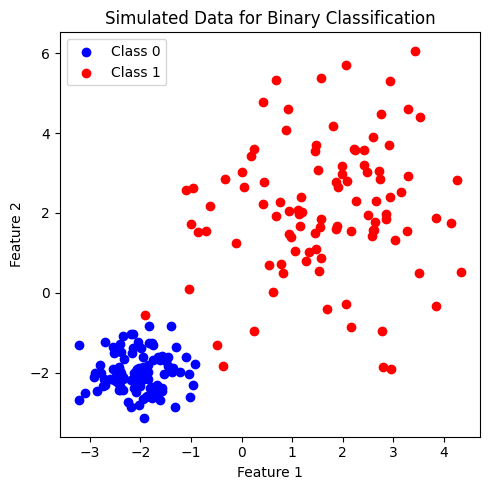

In [5]:
# ทดลองสร้างข้อมูลโดยการเรียกใช้ generate_multi_class_dataset
# กำหนด จำนวนคลาส
n_classes = 2

# กำหนด จำนวน features
n_features = 2

# กำหนดช่วงค่า Mean และ standard deviation (SD) สำหรับแต่ละคลาส
# เนื่องจากเรากำหนดจำนวน features เป็น 2 จึงสามารถกำหนด Mean และ SD ด้วย array ของ 2 ค่า
mean_class = [[-2,-2], [2,2]]
std_class  = [[0.5,0.5], [1.5,1.5]]

# กำหนดจำนวนข้อมูล สำหรับแต่ละคลาส
n_samples = 100

# ทำการสร้างชุดข้อมูล
x, y = generate_multi_class_dataset(n_classes, n_features, mean_class, std_class,n_samples)

# Plot ข้อมูล x, y ที่มีอยู่
plt.figure(figsize = (5,5))
plt.scatter(x[y==0, 0], x[y==0, 1], c='b', label='Class 0')
plt.scatter(x[y==1, 0], x[y==1, 1], c='r', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated Data for Binary Classification')
plt.legend()
plt.tight_layout()
plt.show()

## Decision Boundary

เราสามารถ visualize ลักษณะของ decision boundary (เขตแดนแบ่งแยกคลาส) โดยใช้ [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) จากไลบรารี่ `scikit-learn`

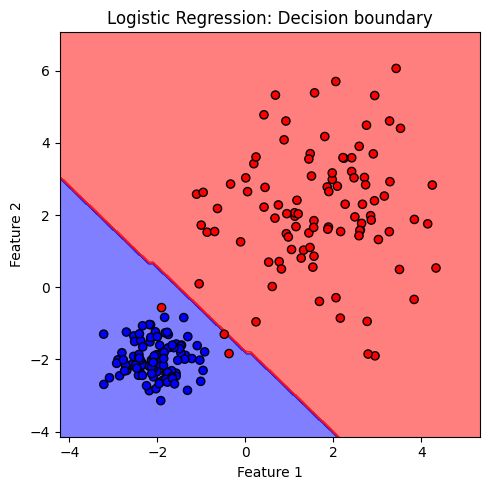

In [6]:
# สร้างโมเดล
clf = LogisticRegression()

# สอนโมเดลจากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้
clf.fit(x, y)

# สร้าง cmap สำหรับแสดงผลตามสีแต่ละ class
cmap_2classes = colors.ListedColormap(['b', 'r'])

# plot the decision boundary
plt.figure(figsize = (5,5))
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(clf,
                                       x,
                                       response_method="predict",
                                       cmap=cmap_2classes,
                                       alpha=0.5,
                                       ax=ax,
                                       xlabel='Feature 1',
                                       ylabel='Feature 2'
                                       )
ax.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_2classes, s=35, edgecolors='k')
plt.title('Logistic Regression: Decision boundary')
plt.tight_layout()
plt.show()

สังเกตได้ว่า decision boundary ของโมเดล logistic มีลักษณะเป็นเส้นตรง จำแนกกลุ่มข้อมูลต่างคลาสออกจากกัน

## Logistic Regression เมื่อใช้ `solver` ชนิดต่างๆ

เราสามารถ optimize โมเดล logistic โดยการหาค่าโมเดลพารามิเตอร์ $w$ ที่เหมาะสมด้วย iterative solver ที่ประมาณค่าคำตอบจากการปรับค่าและคำนวณซ้ำๆ เพื่อให้ได้คำตอบที่เข้าใกล้คำตอบที่ถูกต้องมากที่สุด อาทิเช่น

**Newton-CG Solver**:
- ใช้วิธี Newton-Conjugate Gradient
- เหมาะสำหรับข้อมูลขนาดใหญ่ แต่จะใช้ computational time มากตามจำนวน features
- สามารถใช้ร่วมกับ L2 regularization

**lbfgs Solver (Limited-memory Broyden-Fletcher-Goldfarb-Shanno)**:
- ใช้ L-BFGS algorithm ในการค้นหาค่าพารามิเตอร์ที่เหมาะสม
- เหมาะสำหรับข้อมูลขนาดเล็กถึงกลาง
- เป็น default solver ของ `scikit-learn` ในการทำ logistic regression
- สามารถใช้ร่วมกับ L2 regularization

**liblinear Solver**:
- วิธีการนี้ใช้เทคนิคจากไลบรารี LIBLINEAR
- เหมาะสำหรับข้อมูลขนาดเล็ก
- สามารถใช้ร่วมกับ L1 และ L2 regularization

เราสามารถเลือกใช้ iterative solver ที่เหมาะสมโดยยังมี hyperparameters อีก 2 ตัวที่กำหนดการหยุดทำงานของ iterative solvers เหล่านี้ ได้แก่
- `tol` คือ ค่า tolerance เป็นการกำหนดระดับความแม่นยำ (precision) ของ คำตอบจาก iterative solver โดยเมื่อค่าคำตอบที่ได้จาก solver มีการเปลี่ยนแปลงน้อยกว่าค่า tolerance ที่กำหนด จะถือว่าได้ค่าตอบที่มีความถูกต้องในระดับความแม่นยำที่ต้องการ และหยุดการคำนวณ
- `max_iter` กำหนดจำนวนครั้งมากที่สุดที่ให้ solver คำนวณหาค่าคำตอบ ก่อนยุติการคำนวณ

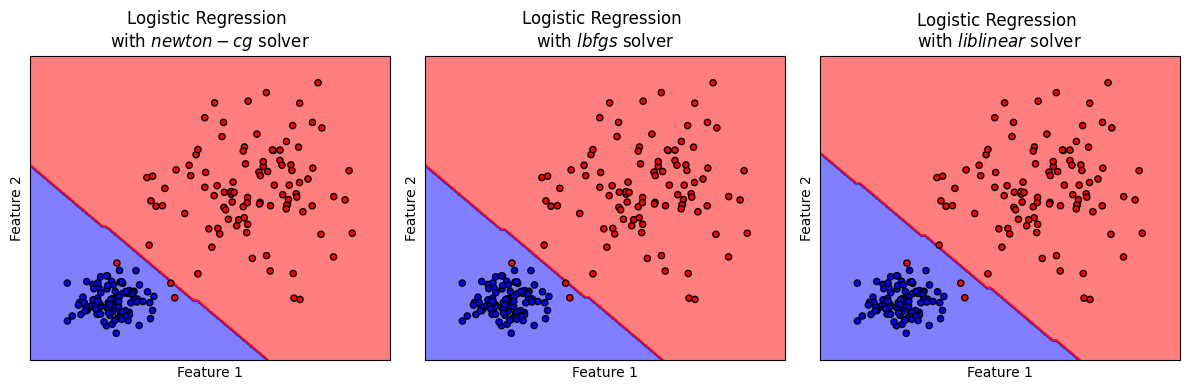

In [7]:
# สร้างชุดโมเดล
models = (LogisticRegression(solver='newton-cg', max_iter=100, tol=1e-4),
          LogisticRegression(solver='lbfgs', max_iter=100, tol=1e-4),
          LogisticRegression(solver='liblinear', max_iter=100, tol=1e-4),
          )
# สอนโมเดลจากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้
models = (clf.fit(x, y) for clf in models)

# ตั้งชื่อ plot ที่สอดคล้องกับชุดข้อมูล
titles = ['Logistic Regression \nwith $newton-cg$ solver',
          'Logistic Regression \nwith $lbfgs$ solver',
          'Logistic Regression \nwith $liblinear$ solver',
          ]

# plot the decision boundaries
fig, axes = plt.subplots(1,3, figsize=(12, 4))
for clf, title, ax in zip(models, titles, axes.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(clf,
                                                  x,
                                                  response_method="predict",
                                                  cmap=cmap_2classes,
                                                  alpha=0.5,
                                                  ax=ax,
                                                  xlabel='Feature 1',
                                                  ylabel='Feature 2',
                                                  )
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_2classes, s=20, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.tight_layout()
plt.show()

จะเห็นได้ว่า solvers ต่างๆ สามารถค้นหาค่าพารามิเตอร์ $w$ ที่เหมาะสม โดยมี decision boundary ที่ใกล้เคียงกัน ทั้งนี้ decision boundary ของโมเดล logistic จะประกอบขึ้นจากเส้นตรง

## Regularization

หากพบปัญหา overfitting หรือการเรียนรู้ข้อมูลฝึกสอนมากเกินไปจนโมเดลจดจำคำตอบ เราสามารถใช้ regularization ร่วมกับ logistic regression

ในไลบรารี่ `scikit-learn` เราสามารถปรับค่า regularization strength $\lambda$ ได้โดยผ่านทางไฮเปอร์พารามิเตอร์ `C` โดย ค่า `C` มีค่าเท่ากับ $1/\lambda$ (Inverse of Regularization Strength)


## Logistic Regression Pipeline

ต่อไปเราจะลองพัฒนาโมเดล logistic อย่างครบกระบวนการ ด้วยชุดข้อมูลที่จะสร้างขึ้น

### Generate 3-class Dataset

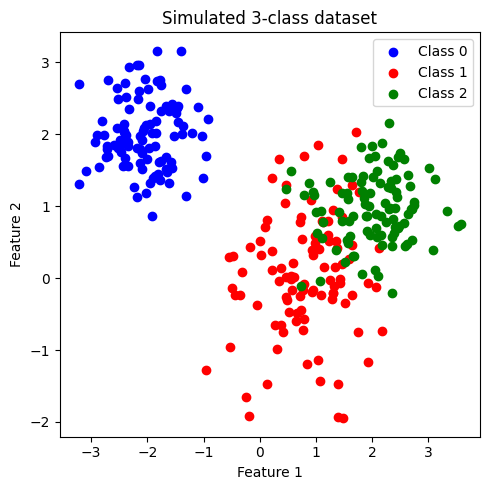

In [8]:
# สร้างข้อมูลโดยการเรียกใช้ generate_multi_class_dataset
# กำหนด จำนวนคลาส
n_classes = 3

# กำหนด จำนวน features
n_features = 2

# กำหนดช่วงค่า Mean และ standard deviation สำหรับแต่ละคลาส
mean_class = [[-2,2], [1,0], [2,1]]
std_class  = [[0.5,0.5], [0.75,0.75],[0.75,0.5]]

# กำหนดจำนวนข้อมูล สำหรับแต่ละคลาส
n_samples = 100

# ทำการสร้างชุดข้อมูล
x, y = generate_multi_class_dataset(n_classes, n_features, mean_class, std_class,n_samples)

# Plot ข้อมูล x, y ที่สร้างขึ้น
plt.figure(figsize = (5,5))
color_list = ['b','r','g']
cmap_3classes = colors.ListedColormap(color_list)

for label in range(n_classes):
    plt.scatter(x[y==label, 0], x[y==label, 1], c=color_list[label], label='Class '+str(label))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated 3-class dataset')
plt.legend()
plt.tight_layout()
plt.show()

ข้อมูลที่สร้างขึ้นมีประกอบด้วย 2 features และ 3 classes (class: 0, 1, 2) โดยข้อมูลในแต่ละคลาสมีจำนวนเท่ากันที่ 200 จุด   เราจะพัฒนาโมเดล logistic เพื่อจำแนกข้อมูลแต่ละคลาสออกจากกัน

เมื่อสังเกตการกระจายตัวของข้อมูล พบว่า class 0 มีการกระจายข้อมูลแบ่งแยกออกมาอย่างเห็นได้ชัด ในขณะที่ class 1 และ class 2 จะกระจายตัวอยู่ร่วมกัน

### แบ่งข้อมูลเป็น training data และ test data

โดยใช้ [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) จากไลบรารี่ `scikit-learn`

ในตัวอย่างนี้เราจะใช้ default value ซึ่งจะ shuffle ข้อมูลก่อนแบ่งข้อมูล และ ไม่ stratify (ไม่กำกับสัดส่วนของคลาสใน training data และ test data)

อย่างไรก็ดี ในกรณีที่ข้อมูลประกอบด้วยคลาสต่างๆ ที่มีสัดส่วนต่างกันอย่างมาก (imbalanced dataset) การทำ stratify มีความจำเป็นอย่างมากเพื่อคงสัดส่วนของแต่ละคลาส ใน training data และ test data

In [9]:
# สร้าง training data และ test data โดยแบ่งจากชุดข้อมูล x,y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    stratify=None, random_state=RANDOM_SEED)

print('Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

print('Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[[ 0. 82.]
 [ 1. 79.]
 [ 2. 79.]]
Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[[ 0. 18.]
 [ 1. 21.]
 [ 2. 21.]]


### ทำการ standardize ข้อมูลทั้งหมด
ใช้ mean และ standard deviation (SD) จาก training data ในการ standardize test set เพื่อป้องกัน information leak

In [10]:
# สร้าง standardized scaler จาก features ใน training data
x_scaler = StandardScaler().fit(x_train)

# scale ค่า features ใน training data และ test data
x_train = x_scaler.transform(x_train)
x_test  = x_scaler.transform(x_test)

### เทรนโมเดล ด้วย base model (default hyperparameter)

Training Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        82
         1.0       0.91      0.89      0.90        79
         2.0       0.89      0.91      0.90        79

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240


Test Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       0.93      0.67      0.78        21
         2.0       0.74      0.95      0.83        21

    accuracy                           0.87        60
   macro avg       0.89      0.87      0.87        60
weighted avg       0.89      0.87      0.86        60



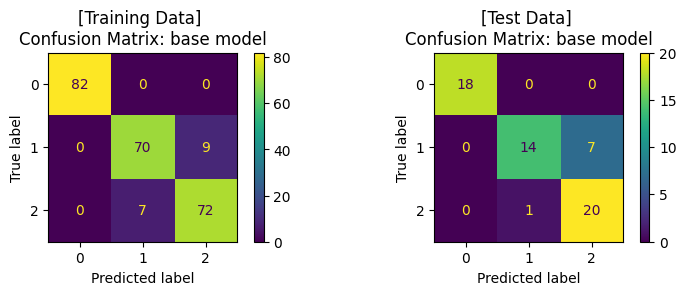

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# สร้างโมเดล
base_clf = LogisticRegression()

# สอนโมเดลด้วย training data
base_clf.fit(x_train,y_train)

# ให้โมเดลทำนาย training data
y_pred = base_clf.predict(x_train)

# แสดงผล classification ของโมเดลจาก training data
print('Training Set: Classification report')
print(classification_report(y_train, y_pred))

# คำนวนและแสดงผล confusion matrix ของ training data
cm = confusion_matrix(y_train, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax1)
ax1.set_title('[Training Data] \nConfusion Matrix: base model')

# ให้โมเดลทำนาย test data
y_pred = base_clf.predict(x_test)

# แสดงผล classification ของโมเดล
print('\nTest Set: Classification report')
print(classification_report(y_test, y_pred))

# คำนวนและแสดงผล confusion matrix ของ test set
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax2)
ax2.set_title('[Test Data] \nConfusion Matrix: base model')

plt.tight_layout()
plt.show()

### ปรับแต่งโมเดล (Hyperparameter Tuning) ด้วย [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) และ train โมเดล

โดยเราจะปรับแต่งโมเดล โดย tune 2 hyperparameters ที่สำคัญของ logistic regression ได้แก่
1. `solver`
2. `C`

ในไลบรารี่ `scikit-learn` ยังมีวิธีการอื่นๆ ในการปรับแต่งโมเดล เช่น
- [CrossValScore](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)
- [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation score: 0.92
Training Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        82
         1.0       0.88      0.90      0.89        79
         2.0       0.90      0.87      0.88        79

    accuracy                           0.93       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.93      0.93      0.92       240


Test Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       0.94      0.71      0.81        21
         2.0       0.77      0.95      0.85        21

    accuracy                           0.88        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.90      0.88      0.88        60



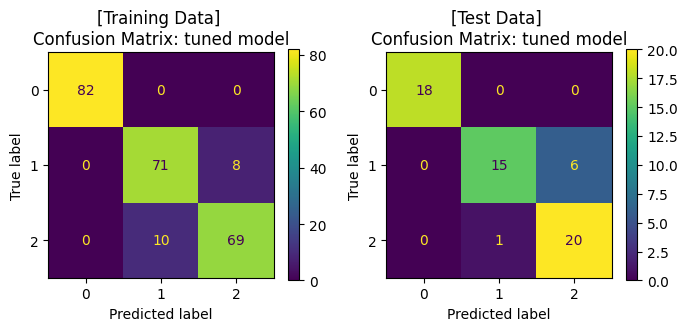

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# กำหนดช่วงค่า hyperparameters ในรูปแบบ dictionary
clf_params = {'solver': ['newton-cg','lbfgs','liblinear'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l2']
              }

# แบ่งข้อมูล training data ด้วย 5-fold cross-validation เพื่อ tune hyperparameter
cv_splitter = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

# ใช้ GridSearchCV เพื่อสอนโมเดลจากชุดค่า hyperparameters จาก clf_params
# และคำนวณค่า accuracy ของแต่ละโมเดล เพื่อเลือกชุด hyperparameters ที่ดีที่สุด
# โดยใช้เทคนิค cross-validation ในการแบ่งกลุ่ม validation data จาก training data
tuned_clf = GridSearchCV(estimator=base_clf, param_grid=clf_params,
                             scoring=['accuracy'], refit='accuracy', cv=cv_splitter)

# fit โมเดลด้วย training data และ ให้โมเดลทำนายค่า y จาก training data
tuned_clf.fit(x_train, y_train)
y_pred = tuned_clf.predict(x_train)

# แสดงผล hyperparameters ที่ดีที่สุด และ cross-validation score
print('Best hyperparameters: {}'.format(tuned_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(tuned_clf.best_score_))

# แสดงผล classification ของโมเดลจาก training data
print('Training Set: Classification report')
print(classification_report(y_train, y_pred))

# คำนวนและแสดงผล confusion matrix ของโมเดลจาก training data
cm = confusion_matrix(y_train, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax1)
ax1.set_title('[Training Data] \nConfusion Matrix: tuned model')

# ให้โมเดลทำนายค่า y จาก test data
y_pred = tuned_clf.predict(x_test)

# แสดงผล classification ของโมเดล จาก test data
print('\nTest Set: Classification report')
print(classification_report(y_test, y_pred))
# คำนวนและแสดงผล confusion matrix จาก test data
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax2)
ax2.set_title('[Test Data] \nConfusion Matrix: tuned model')

plt.show()

จะสังเกตได้ว่า เมื่อมีการปรับจูน hyperparameters ของโมเดลให้มีความเหมาะสมแล้ว เราได้โมเดลที่เรียนรู้จากข้อมูลชุดเดิม แล้วสามารถทำนาย test data ได้ค่า accuracy ที่สูงขึ้น โดยเมื่อพิจารณา Confusion Matrix จะพบว่า โมเดลสามารถจำแนกข้อมูล class 1 และ class 2 ได้ดีขึ้น

### Decision Boundary

เราจะมาลองดู decision boundary ของโมเดลบน training data และ test data

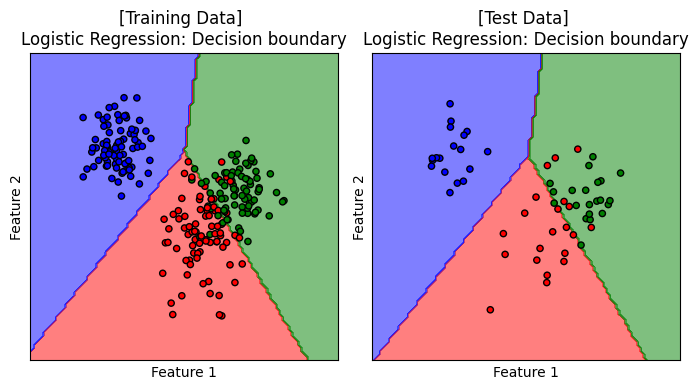

In [13]:
# plot the decision boundaries
fig, axes = plt.subplots(1,2, figsize=(7, 4))
titles = ['[Training Data] \nLogistic Regression: Decision boundary', '[Test Data] \nLogistic Regression: Decision boundary']
for x, y, title, ax in zip([x_train, x_test], [y_train, y_test], titles, axes.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(tuned_clf,
                                                  x,
                                                  response_method="predict",
                                                  cmap=cmap_3classes,
                                                  alpha=0.5,
                                                  ax=ax,
                                                  xlabel='Feature 1',
                                                  ylabel='Feature 2',
                                                  )
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_3classes, s=20, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.tight_layout()
plt.show()

เมื่อชุดข้อมูลประกอบด้วย 3 คลาส decision boundary ของโมเดล logistic regression ยังคงประกอบเส้นตรง เพื่อจำแนกกลุ่มข้อมูลออกจากกัน

**ผู้จัดเตรียม code ใน tutorial**: ดร. กนกกร พิมพ์เจริญ